In [1]:
import astropy
from astropy.coordinates import EarthLocation, SkyCoord, AltAz, ICRS
from astropy.time import Time
from astropy.constants import c
import astropy.units as u
import numpy as np
import matplotlib.pyplot as plt

In [2]:
alt = 57.66 * u.deg  # Altitude
az = 179.99 * u.deg   # Azimuth

green_bank = EarthLocation(lat=38.4330 * u.deg, lon=-79.8397 * u.deg, height=800 * u.m)
jodrell_bank = EarthLocation(lat=53.234329 * u.deg, lon=-2.3050403 * u.deg, height=77 * u.m)

obstime = Time('2024-07-18T09:50:54')

altaz = AltAz(alt=alt, az=az, location=jodrell_bank, obstime=obstime)

skycoord = SkyCoord(altaz)

ra = skycoord.icrs.ra
dec = skycoord.icrs.dec

print(ra.deg,dec.deg)

ra_str = ra.to_string(unit=u.hour, sep=':', pad=True)
dec_str = dec.to_string(unit=u.deg, sep=':', pad=True)

print(f'RA: {ra_str}')
print(f'Dec: {dec_str}')

bary_corr = (skycoord.transform_to(ICRS)).radial_velocity_correction(kind='heliocentric')
barry_corr = bary_corr.to(u.km/u.s)

#print radial velocity correction for barycentre
print(f'Radial Velocity correction to barycentre: {barry_corr}')

81.76574635181774 20.873053993789906
RA: 05:27:03.7791
Dec: 20:52:22.9944
Radial Velocity correction to barycentre: 16.30662787874121 km / s


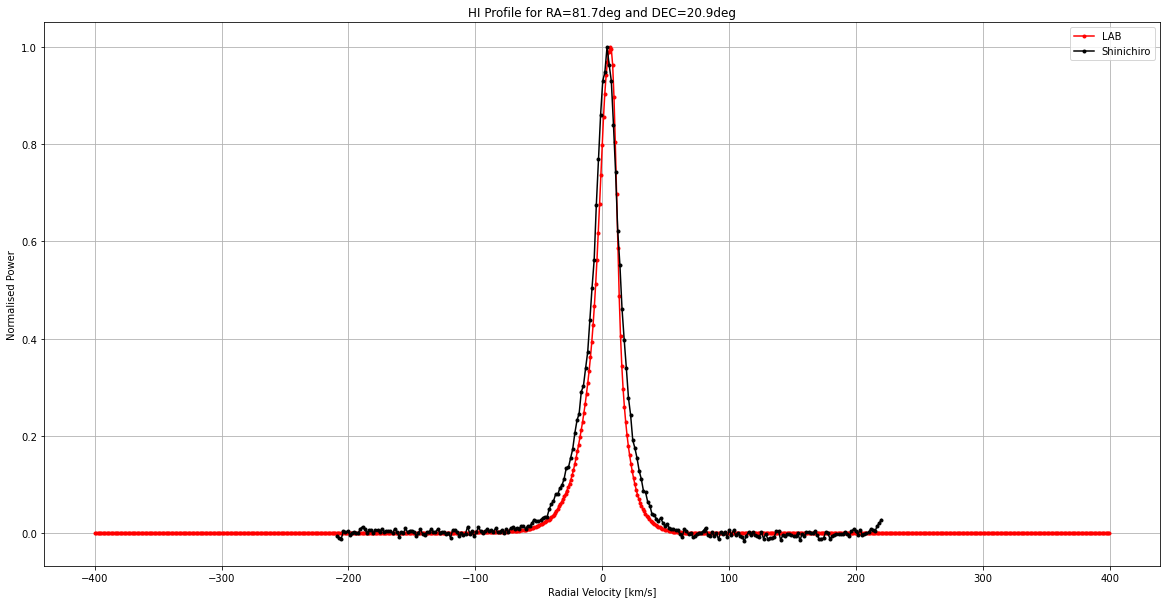

Difference between peak positions: [2.375] km/s
Resolution of LAB, Shinichiro data: 1.0304896907216496 1.69
[1.74600919]


In [40]:
lab_data = np.genfromtxt("spectrum.txt", skip_header=4)
sc_data = np.genfromtxt("20240718T105054_Vlsr.xlsx - 20240718T105054.csv", skip_header=1, delimiter=',')

lab_vel = lab_data[:,0]
lab_pwr = lab_data[:,1] / np.max(lab_data[:,1])
sc_vel = sc_data[0:255,3]
sc_pwr = sc_data[0:255,8]

plt.figure(figsize=(20, 10))
plt.plot(lab_vel, lab_pwr, marker=".", color='r', label="LAB")
plt.plot(sc_vel, sc_pwr, marker=".", color='k', label='Shinichiro')
plt.xlabel('Radial Velocity [km/s]')
plt.ylabel('Normalised Power')
plt.grid(True)
plt.legend()
plt.title("HI Profile for RA=81.7deg and DEC=20.9deg")
plt.show()

lab_pk = lab_vel[np.where(lab_pwr == np.max(lab_pwr))]
sc_pk = sc_vel[np.where(sc_pwr == np.max(sc_pwr))]
pk_dif = lab_pk-sc_pk
print("Difference between peak positions:", pk_dif, "km/s")

lab_res = np.abs(np.sum(np.diff(lab_vel))/(len(lab_vel)-1))
sc_res = np.abs(np.sum(np.diff(sc_vel))/(len(sc_vel)-1))
print("Resolution of LAB, Shinichiro data:", lab_res, sc_res)

print(pk_dif/((lab_res/2)+(sc_res/2)))

